<a href="https://colab.research.google.com/github/Eliasamuneke/Quickstart_lab/blob/main/CRATE_AND_BARREL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installing and Importng the necessary library

In [25]:
import pandas as pd                                                             # Importing pandas module for reading the dataset
import numpy as np                                                              # Importing the numpy module for arry manipulation
import seaborn as sns                                                           # Importing seaborn module for graph visualization
import matplotlib.pyplot as plt                                                 # Importing matplotlib module for graph visualization
from sklearn.model_selection import train_test_split                            # Importing the train_test_split method for data division
from sklearn.naive_bayes import GaussianNB                                      # Importing the GaussianNB module for model classifier
from sklearn.ensemble import RandomForestClassifier                             # Importing the RandomForestClassifier module for model classifier
from sklearn.linear_model import LogisticRegression                             # Importing the LogisticRegression method for model builder
from sklearn.model_selection import cross_val_score,StratifiedKFold,KFold,GridSearchCV # Improting module for checking the classifier
from sklearn.preprocessing import LabelEncoder                                  # Importing the labelencoder method for labeling the data
from sklearn.metrics import roc_auc_score, log_loss                             # Importing the log_loss module for checking the loss 
from sklearn.metrics import classification_report, confusion_matrix             # Importing the confusion matrix method

### Reading the Training dataset

In [5]:
df = pd.read_csv("/content/train.csv" ,index_col=0)                      # Reading the training dataset using the read_csv method.            
df

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61874,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61875,4,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61876,0,0,0,0,0,0,0,3,1,0,...,0,3,1,0,0,0,0,0,0,Class_9


In [6]:
df['target'].value_counts()                        # Checking the target column with counting value

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

In [7]:
df.shape                                          # Checking the shape of dataset

(61878, 94)

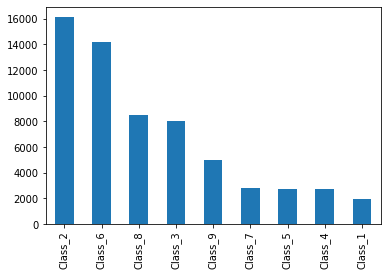

In [8]:
df["target"].value_counts().plot.bar()                    # Plotting the bargraph of target column

### Dividing the training data as feature and target variables

In [33]:
X_train = df.drop('target',axis=1)                       # Dropping the target column from the training dataset
y_train = df['target']                                   # Storing the target column into the y variable

### Doing Label encoding

In [34]:
le = LabelEncoder()                             # Labelencoder method
le_y = le.fit_transform(y_train)                      # calling fit_transforming method and passing y lebel 

### Building binary classifer

In [35]:
logreg = LogisticRegression(multi_class= 'auto')         
logreg.fit(X, le_y)                                 # Training the tarin dataset using the fit method

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

### Reading the test dataset

In [37]:
X_test = pd.read_csv("/content/test.csv", index_col=0)         # Reading the test dataset file using read_csv method
pred_y = logreg.predict_proba(X_test)                            # Preditcting the values using the test dataset

In [38]:
pred_y

array([[7.17312340e-06, 1.54756752e-01, 2.30839329e-01, ...,
        4.23559832e-03, 2.08792280e-07, 8.28972137e-09],
       [9.67156132e-04, 1.52446576e-05, 8.94441769e-08, ...,
        1.16726254e-04, 2.95602485e-01, 1.16289124e-03],
       [1.79183195e-06, 9.85916842e-08, 2.60037558e-08, ...,
        8.06293960e-05, 6.57981012e-05, 4.32165433e-07],
       ...,
       [9.07696811e-15, 2.40801568e-01, 5.36829451e-01, ...,
        1.46098182e-03, 8.64031558e-12, 3.25838886e-13],
       [5.04170852e-06, 7.42613584e-01, 1.30797603e-01, ...,
        6.73535012e-04, 3.23430442e-05, 9.56371635e-06],
       [1.95366250e-04, 4.45547644e-01, 4.25873357e-01, ...,
        5.31901549e-02, 1.89281653e-05, 3.90675340e-05]])

In [39]:
list(le.classes_)            # Printing the predicted calss

['Class_1',
 'Class_2',
 'Class_3',
 'Class_4',
 'Class_5',
 'Class_6',
 'Class_7',
 'Class_8',
 'Class_9']

In [40]:
pred_prob = pd.DataFrame(pred_y,columns=list(le.classes_))         # Printing the predicted classified class with values
pred_prob

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,7.173123e-06,1.547568e-01,2.308393e-01,6.101544e-01,8.665241e-14,6.485298e-06,4.235598e-03,2.087923e-07,8.289721e-09
1,9.671561e-04,1.524466e-05,8.944418e-08,1.384590e-08,1.040615e-07,7.021353e-01,1.167263e-04,2.956025e-01,1.162891e-03
2,1.791832e-06,9.859168e-08,2.600376e-08,7.622446e-10,1.047403e-09,9.998512e-01,8.062940e-05,6.579810e-05,4.321654e-07
3,2.507928e-10,7.054741e-01,2.875434e-01,6.982262e-03,3.192955e-09,6.923606e-09,6.117293e-08,1.776167e-09,1.415408e-07
4,6.738376e-01,4.416671e-07,1.621856e-07,1.148540e-09,8.015383e-11,4.202979e-03,1.089662e-03,4.420989e-02,2.766593e-01
...,...,...,...,...,...,...,...,...,...
144363,2.648479e-01,1.223754e-02,2.872340e-03,2.595149e-03,9.371955e-06,3.145951e-01,2.241221e-01,6.365408e-02,1.150664e-01
144364,2.901184e-03,3.474019e-01,3.560293e-01,1.798788e-01,1.029047e-06,2.064139e-03,1.113842e-01,2.656190e-04,7.384261e-05
144365,9.076968e-15,2.408016e-01,5.368295e-01,2.209079e-01,2.009070e-18,1.130039e-07,1.460982e-03,8.640316e-12,3.258389e-13
144366,5.041709e-06,7.426136e-01,1.307976e-01,1.258388e-01,9.202009e-06,2.029080e-05,6.735350e-04,3.234304e-05,9.563716e-06


### Building the 2nd model using the randomforest classifier

In [44]:
rfc = RandomForestClassifier(oob_score=True)           # Calling the randomforest classifier method
rfc.fit(X_train,le_y)                                        # fitting the dataset into the fit method for training

RandomForestClassifier(oob_score=True)

In [45]:
randm_pred = rfc.predict(X_test)                        # Predicting the values
randm_pred

array([3, 5, 5, ..., 1, 1, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


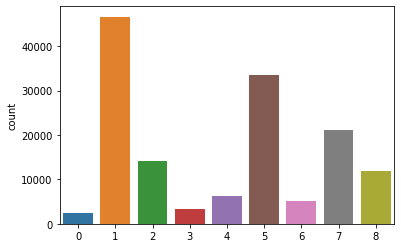

In [46]:
sns.countplot(rfc.predict(X_test))                    # Plotting the graph of predicted values
plt.show()

### Building the 3rd model using the GaussianNB classifier

In [48]:
gb = GaussianNB()                        # Calling the GaussianNB method
gb.fit(X_train, le_y)                    # Train the model using the train dataset

GaussianNB()

In [49]:
y_pred_prob1 = gb.predict_proba(X_test)    # Predicting the values
y_pred_prob1 

array([[1.62061273e-147, 7.67095997e-011, 2.75264563e-006, ...,
        2.56627017e-035, 6.47404434e-242, 9.72978070e-240],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.33013834e-213, 3.66080449e-004, 0.00000000e+000],
       [5.71204064e-295, 0.00000000e+000, 0.00000000e+000, ...,
        1.38218709e-262, 9.61320456e-040, 5.38055572e-274],
       ...,
       [0.00000000e+000, 2.88618980e-031, 9.99996058e-001, ...,
        4.98141055e-020, 3.39924951e-154, 0.00000000e+000],
       [1.99302975e-058, 9.65274269e-001, 2.43714301e-007, ...,
        1.15949178e-038, 2.17304478e-078, 8.70958021e-044],
       [1.20395351e-050, 9.96537055e-001, 1.78105708e-003, ...,
        4.82130958e-031, 1.25388096e-079, 4.16484700e-051]])

In [50]:
pred_prob1 = pd.DataFrame(y_pred_prob1,columns=list(le.classes_))   # Printing the values with classified class
pred_prob1

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1.620613e-147,7.670960e-11,2.752646e-06,9.999972e-01,0.000000e+00,1.833379e-280,2.566270e-35,6.474044e-242,9.729781e-240
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.996339e-01,1.330138e-213,3.660804e-04,0.000000e+00
2,5.712041e-295,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.382187e-262,9.613205e-40,5.380556e-274
3,1.231444e-272,1.000000e+00,2.192188e-10,6.433092e-10,0.000000e+00,1.105587e-265,5.484370e-85,0.000000e+00,2.604258e-277
4,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.870001e-132,1.906576e-25,1.320758e-32,3.818611e-10
...,...,...,...,...,...,...,...,...,...
144363,3.074203e-05,7.357479e-65,5.794285e-47,7.338734e-61,1.096547e-159,7.249458e-12,3.608036e-09,3.688682e-22,9.999693e-01
144364,4.900090e-61,4.006456e-01,4.308495e-02,5.562695e-01,0.000000e+00,1.956246e-102,3.750720e-31,6.218092e-95,2.644114e-93
144365,0.000000e+00,2.886190e-31,9.999961e-01,3.942123e-06,0.000000e+00,8.905514e-182,4.981411e-20,3.399250e-154,0.000000e+00
144366,1.993030e-58,9.652743e-01,2.437143e-07,3.472549e-02,3.792563e-118,2.514118e-75,1.159492e-38,2.173045e-78,8.709580e-44
